## Python - Predicting the risk of diabetes at early stage
#### Using machine learning classification algorithms to predict the early-stage diabetes risk

#### Click [here](https://diabetes-predictor-01.streamlit.app/) to access the app

#### Contents

1. Dataset
2. Problem
3. Data loading and preprocessing
4. Exploratory data analysis and visualization
5. Feature engineering
6. Model selection and training\
    6.1. Testing the model
7. Conclusions

#### 1. Dataset

The dataset is available from:

https://archive-beta.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

#### 2. Problem

This is a classification problem with one target variable of two classes.

Attribute Information:

- Age -- 20-65		
- Sex -- 1. Male, 2.Female		
- Polyuria --  1.Yes, 2.No.		
- Polydipsia -- 1.Yes, 2.No.		
- sudden weight loss -- 1.Yes, 2.No.		
- weakness -- 1.Yes, 2.No.		
- Polyphagia -- 1.Yes, 2.No.		
- Genital thrush -- 1.Yes, 2.No.		
- visual blurring -- 1.Yes, 2.No.		
- Itching -- 1.Yes, 2.No.		
- Irritability -- 1.Yes, 2.No.		
- delayed healing -- 1.Yes, 2.No.		
- partial paresis -- 1.Yes, 2.No.		
- muscle stiffness -- 1.Yes, 2.No.		
- Alopecia -- 1.Yes, 2.No.		
- Obesity -- 1.Yes, 2.No.		
- Class -- 1.Positive, 2.Negative.	

#### 3. Data loading and preprocessing

In [115]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold



warnings.filterwarnings('ignore')

In [29]:
diabetes_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/projects/diabetes/diabetes_data_upload.csv")

In [30]:
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [31]:
# check shape
diabetes_df.shape

(520, 17)

In [32]:
diabetes_df_copy = diabetes_df.copy()

In [33]:
# remove spaces from column names
diabetes_df_copy.columns = diabetes_df_copy.columns.str.replace(' ', '_').str.lower()

In [34]:
diabetes_df_copy

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [36]:
# encode features to binary
cols = diabetes_df_copy.columns[diabetes_df_copy.columns.get_loc('gender'): diabetes_df_copy.columns.get_loc('class')+1].tolist()

encoder = LabelEncoder()

diabetes_df_copy[cols] = diabetes_df_copy[cols].apply(encoder.fit_transform)
diabetes_df_copy

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#### 4. Exploratory data analysis and visualization

In [37]:
# describe the dataset
diabetes_df_copy.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# check for NAs
diabetes_df_copy.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

In [39]:
# check duplicates - for this dataset it is possible to have many duplicate rows due to the type of data
diabetes_df_copy[diabetes_df_copy.duplicated()]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
84,35,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


In [40]:
diabetes_df_copy.dtypes

age                   int64
gender                int32
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 int32
dtype: object

In [177]:
# change class type - interesting for some algorithms and metrics, but not necessary
#diabetes_df_copy['class'] = diabetes_df_copy['class'].astype('category')

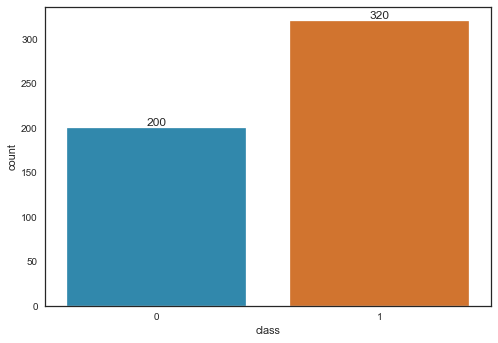

In [41]:
# class distribution
sns.set_style("white")

ax = sns.countplot(data=diabetes_df_copy, x='class',
              palette=['#1d91c0', "#ec7014"])

for i in ax.containers:
    ax.bar_label(i)

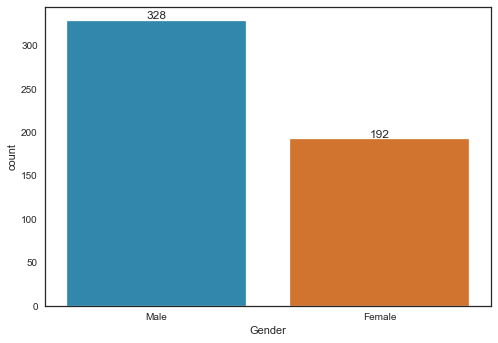

In [42]:
# gender distribution
ax = sns.countplot(data=diabetes_df, x='Gender',
              palette=['#1d91c0', "#ec7014"])

for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='class', ylabel='age'>

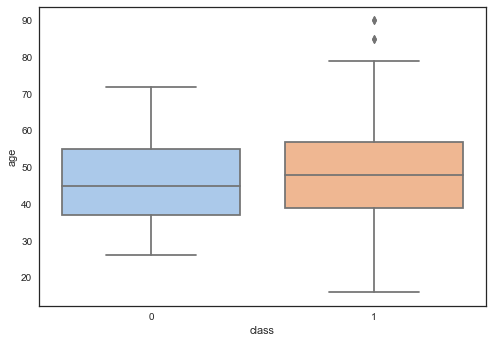

In [43]:
sns.boxplot(x='class', y='age', palette="pastel", data=diabetes_df_copy)

<AxesSubplot:>

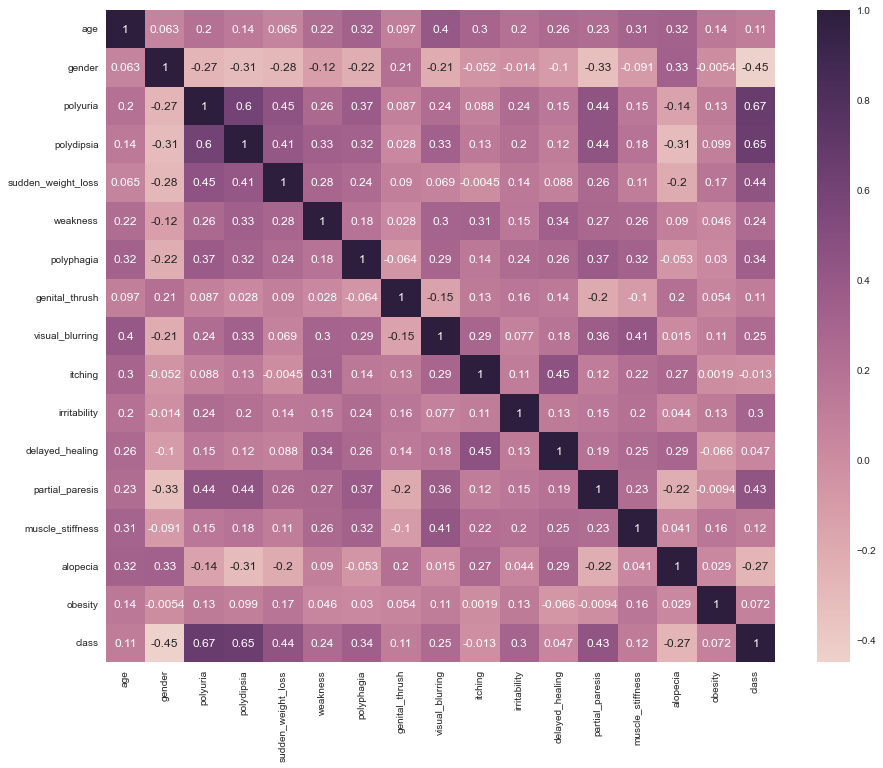

In [44]:
# check correlations between variables
corr_wine = diabetes_df_copy.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_wine, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

#### 5. Feature engineering

In [45]:
x = diabetes_df_copy.drop(['class'], axis=1)
y = diabetes_df_copy['class']

In [46]:
# check mutual information (importance) of each feature
importance = mutual_info_classif(x, y, random_state=42)
df_importance = pd.DataFrame({'features': x.columns, 'importance': importance.round(2)})
df_importance.sort_values(by='importance', ascending=False)

,features,importance
3,polydipsia,0.26
2,polyuria,0.25
12,partial_paresis,0.15
1,gender,0.11
4,sudden_weight_loss,0.08
6,polyphagia,0.06
10,irritability,0.06
13,muscle_stiffness,0.03
8,visual_blurring,0.02
9,itching,0.01


<AxesSubplot:xlabel='importance', ylabel='features'>

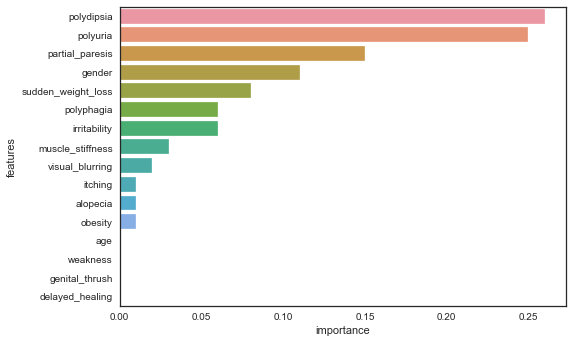

In [47]:
sns.barplot(x='importance', y='features', data=df_importance.sort_values(by='importance', ascending=False), orient='h')

In [48]:
# Perform ANOVA test on each feature
f_values, p_values = f_classif(x, y)

# Create a dictionary of feature names and ANOVA scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = f_values[i],p_values[i]

# Sort the features by ANOVA score (in descending order)
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their ANOVA scores
d = []
for feature, score in sorted_scores:
    d.append({'Feature': feature, 'F': score[0], 'p': score[1]})

df_anova = pd.DataFrame(d)

# add significance column
signif = []

for p in df_anova['p']:
    if p <= 0.05:
        signif.append('significant')
    else:
        signif.append('not significant')

df_anova['signif'] = signif
df_anova

,Feature,F,p,signif
0,polyuria,412.738410,6.384838e-68,significant
1,polydipsia,376.422649,1.964187e-63,significant
2,gender,130.968787,3.422093e-27,significant
3,sudden_weight_loss,121.973731,1.307517e-25,significant
4,partial_paresis,119.046534,4.328222e-25,significant
5,polyphagia,68.841759,9.295946e-16,significant
6,irritability,51.030999,3.099695e-12,significant
7,alopecia,39.926590,5.687734e-10,significant
8,visual_blurring,34.917760,6.238605e-09,significant
9,weakness,32.585064,1.922906e-08,significant


Looks like 'obesity', 'delayed_healing' and 'itching' do not affect the target variable. It is an inferencial test on the data available and do not mean those features are not relevant for the problem in a general context. Maybe the models could be explored considering or not theses variables.

#### 6. Model selection and evaluation

In [49]:
def split_data(x, y):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, shuffle=True, random_state=123)
    return X_train, X_test, y_train, y_test

In [50]:
X_train, X_test, y_train, y_test = split_data(x,y)

In [51]:
scaler = StandardScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.fit_transform(X_test[['age']])

In [52]:
X_train

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
42,0.203401,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0
376,-0.393078,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
184,0.032978,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1
41,0.203401,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
494,-0.989557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-1.074768,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
322,1.396359,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0
382,1.737204,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0
365,-0.222655,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0


In [53]:
def count_elements(data):
    unique_elements, counts = np.unique(data, return_counts=True)
    for element, count in zip(unique_elements, counts):
        print(f"{element}: {count}")

In [54]:
count_elements(y)

0: 200
1: 320


In [55]:
count_elements(y_train)

0: 162
1: 254


In [56]:
count_elements(y_test)

0: 38
1: 66


In [88]:
lr_params = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2']
    }

svm_params = {
    'C': [0.1, 1, 10], 
    'gamma': [1, 0.1, 0.01], 
    'kernel': ['linear', 'rbf', 'sigmoid']
    }

rf_params = {'n_estimators': [10, 50, 100],
             'criterion': ['gini', 'entropy'],
             'max_depth': [None, 10, 30, 100],
             'min_samples_leaf': [1, 3, 5],
             'min_samples_split': [2, 5, 10]}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 5, 10]
    }

gb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 3, 5]
}

In [89]:
# Create a KFold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [90]:
def classify(X_train, X_test, y_train, y_test, weight):

    # Logistic Regression Classifier
    lr = GridSearchCV(LogisticRegression(class_weight=weight, random_state=0), param_grid=lr_params, cv=kf)
    lr.fit(X_train, y_train)
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    print(f"Logistic Regression Accuracy: {lr_score}")

    # Support Vector Machine Classifier
    svm = GridSearchCV(SVC(class_weight=weight, random_state=0), param_grid=svm_params, cv=kf)
    svm.fit(X_train, y_train)
    svm_score = accuracy_score(y_test, svm.predict(X_test))
    print(f"SVM Accuracy: {svm_score}")
    
    # Random Forest Classifier
    rf = GridSearchCV(RandomForestClassifier(class_weight=weight, random_state=0), param_grid=rf_params, cv=kf)
    rf.fit(X_train, y_train)
    rf_score = accuracy_score(y_test, rf.predict(X_test))
    print(f"Random Forest Accuracy: {rf_score}")
    
    # Decision Tree Classifier
    dt = GridSearchCV(DecisionTreeClassifier(class_weight=weight, random_state=0), param_grid=dt_params, cv=kf)
    dt.fit(X_train, y_train)
    dt_score = accuracy_score(y_test, dt.predict(X_test))
    print(f"Decision Tree Accuracy: {dt_score}")

    # Gradient Boosting Classifier
    gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=gb_params, cv=kf)
    gb.fit(X_train, y_train)
    gb_score = accuracy_score(y_test, gb.predict(X_test))
    print(f"Gradient Boosting Accuracy: {gb_score}")

    # Choose the best classifier
    classifiers = [('Logistic Regression', lr.best_estimator_, lr_score), 
                   ('SVM', svm.best_estimator_, svm_score), 
                   ('Random Forest', rf.best_estimator_, rf_score), 
                   ('Decision Tree', dt.best_estimator_, dt_score),
                   ('Gradient Boosting', gb.best_estimator_, gb_score)]
    best_classifier = max(classifiers, key=lambda x: x[2])
    print(f"\nBest Classifier: {best_classifier[0]} with an accuracy of {best_classifier[2]}")
    print(f"\nBest Classifier Parameters: {best_classifier[1]}")

    return best_classifier[1] # Return the best classifier for further use

Original data

In [91]:
best_model_original = classify(X_train, X_test, y_train, y_test, weight=None)

Logistic Regression Accuracy: 0.9423076923076923
SVM Accuracy: 0.9711538461538461
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 0.9230769230769231
Gradient Boosting Accuracy: 0.9615384615384616

Best Classifier: Random Forest with an accuracy of 1.0

Best Classifier Parameters: RandomForestClassifier(max_depth=10, random_state=0)


In [92]:
pred_orig = best_model_original.predict(X_test)

print(classification_report(y_test, pred_orig))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Balanced Class Weight

In [93]:
best_model_balanced = classify(X_train, X_test, y_train, y_test, weight='balanced')

Logistic Regression Accuracy: 0.8942307692307693
SVM Accuracy: 0.9711538461538461
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 0.9230769230769231
Gradient Boosting Accuracy: 0.9615384615384616

Best Classifier: Random Forest with an accuracy of 1.0

Best Classifier Parameters: RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)


In [94]:
pred_bal = best_model_balanced.predict(X_test)

print(classification_report(y_test, pred_bal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



Oversampling

In [95]:
sm = SMOTE(random_state = 42)
x_sm, y_sm = sm.fit_resample(x, y)

In [96]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = split_data(x_sm, y_sm)

In [97]:
count_elements(y_sm)

0: 320
1: 320


In [98]:
scaler_sm = StandardScaler()
X_train_sm['age'] = scaler_sm.fit_transform(X_train_sm[['age']])
X_test_sm['age'] = scaler_sm.fit_transform(X_test_sm[['age']])

In [99]:
X_train_sm

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
494,-0.983616,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,-0.739894,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
177,0.153754,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0
403,0.397477,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0
171,-0.008727,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-1.064857,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
322,1.291125,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0
382,1.616088,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0
365,-0.252449,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0


In [100]:
best_model_sm = classify(X_train_sm, X_test_sm, y_train_sm, y_test_sm, weight = None)

Logistic Regression Accuracy: 0.8984375
SVM Accuracy: 0.984375
Random Forest Accuracy: 0.9921875
Decision Tree Accuracy: 0.984375
Gradient Boosting Accuracy: 0.9765625

Best Classifier: Random Forest with an accuracy of 0.9921875

Best Classifier Parameters: RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=0)


In [101]:
pred_sm = best_model_sm.predict(X_test_sm)

print(classification_report(y_test_sm, pred_sm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        65

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



Keep the model trained on the original data

In [103]:
ft_cols = ['age',
           'gender',
           'polyuria',
           'polydipsia',
           'sudden_weight_loss',
           'weakness',
           'polyphagia',
           'genital_thrush',
           'visual_blurring',
           'itching',
           'irritability',
           'delayed_healing',
           'partial_paresis',
           'muscle_stiffness',
           'alopecia',
           'obesity']


<AxesSubplot:xlabel='importance', ylabel='features'>

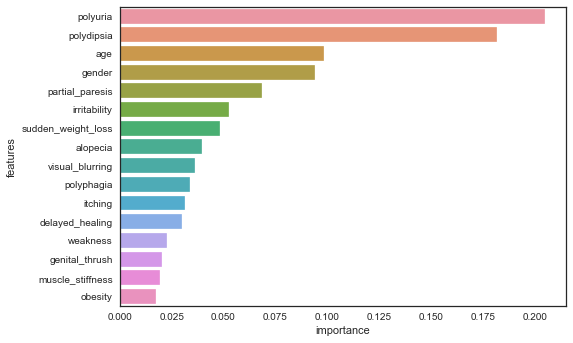

In [104]:
imp = best_model_original.feature_importances_
df_imp = pd.DataFrame({'features': ft_cols, 'importance': imp})
df_imp.sort_values(by='importance', ascending=False)
sns.barplot(x='importance', y='features', data=df_imp.sort_values(by='importance', ascending=False), orient='h')

In [105]:
# save model and scaler
joblib.dump(best_model_original, 'diabetes_DT_model.joblib')

['diabetes_DT_model.joblib']

In [106]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

##### 6.1 Testing the model

In [107]:
model = joblib.load('diabetes_DT_model.joblib')
scaler = joblib.load('scaler.joblib')

In [109]:
def plot_confusion_matrix(model, X_train, X_test, y_train, y_test, classes):
    plt.figure(figsize=(6,6))
    cm = ConfusionMatrix(model, classes = classes, percent=True)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

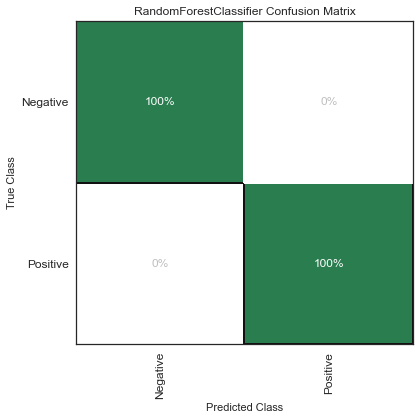

In [110]:
plot_confusion_matrix(model, X_train, X_test, y_train, y_test, classes = ['Negative', 'Positive']) 

In [122]:
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Precision = {precision.round(2)}")
print(f"Recall = {recall.round(2)}")
print(f"F1 Score = {f1score.round(2)}")

Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [150]:
new_data = diabetes_df_copy.iloc[[100]]
new_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
100,48,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1


In [151]:
new_data = diabetes_df_copy.drop('class', axis = 1).iloc[[100]]

# Scale the 'age' column only
scaled_age = scaler.transform(new_data.loc[:, 'age'].values.reshape(-1, 1))

# Replace the original 'age' column with the scaled values
new_data.iloc[:, 0] = scaled_age.flatten()

new_data

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
100,-0.125263,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1


In [153]:
prediction = model.predict_proba(new_data)
prediction[0, 1]

1.0

#### 7. Conclusions

In this study, I explored a dataset of diabetes signs and symptoms and applied different machine learning classifiction models. Since the dataset has unbalanced classes, I investigated three different approaches. The first approach considered the original data, in the second one I adjusted the class weight in the models so that the class with less samples would have higher weight. The second approach was to use a method to oversample the data in order to increase the sample size of the class with less samples in the original dataset. The first and second approaches reached the best metrics and the Random Forest model was able to classify 100% of the test data, correctly. Oversampling the data with SMOTE decreased the performance of the precision of the random forest model.